# Discrete event simulation

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from server_queue import server_system

In [2]:
# Number of repeats of every simulation
repeats = 400

### Determine the number of jobs to reach a steady-state

#### System load = 0.1

In [3]:
n_jobs = [100, 1000, 10000]

arrival_rate = 0.5
service_time = 1/5

In [4]:
system = server_system(n_jobs[0], 1, arrival_rate, service_time, queue_model='fifo')

In [5]:
avg_waiting_time_1 = dict()

for n in n_jobs:
    avg_waiting_time_1['%s' % n] = []
    system.n_jobs = n
    
    for _ in range(repeats):
        system.run()
        avg_waiting_time_1['%s' % n].append(np.average(system.waiting_times))

#### System load = 0.4

In [6]:
arrival_rate = 2
service_time = 1/5

In [7]:
system.arrival_rate = arrival_rate

In [8]:
avg_waiting_time_4 = dict()

for n in n_jobs:
    avg_waiting_time_4['%s' % n] = []
    system.n_jobs = n
    
    for _ in range(repeats):
        system.run()
        avg_waiting_time_4['%s' % n].append(np.average(system.waiting_times))

#### System load = 0.8

In [9]:
arrival_rate = 4
service_time = 1/5

n_jobs = [1000, 10_000, 100_000]

In [10]:
system.arrival_rate = arrival_rate

In [11]:
avg_waiting_time_8 = dict()

for n in n_jobs:
    avg_waiting_time_8['%s' % n] = []
    system.n_jobs = n
    
    for _ in range(repeats):
        system.run()
        avg_waiting_time_8['%s' % n].append(np.average(system.waiting_times))

#### System load = 0.9

In [12]:
arrival_rate = 4.5
service_time = 1/5

n_jobs = [1000, 10_000, 100_000]

In [13]:
system.arrival_rate = arrival_rate

In [14]:
avg_waiting_time_9 = dict()

for n in n_jobs:
    avg_waiting_time_9['%s' % n] = []
    system.n_jobs = n
    
    for _ in range(repeats):
        system.run()
        avg_waiting_time_9['%s' % n].append(np.average(system.waiting_times))

#### Plot

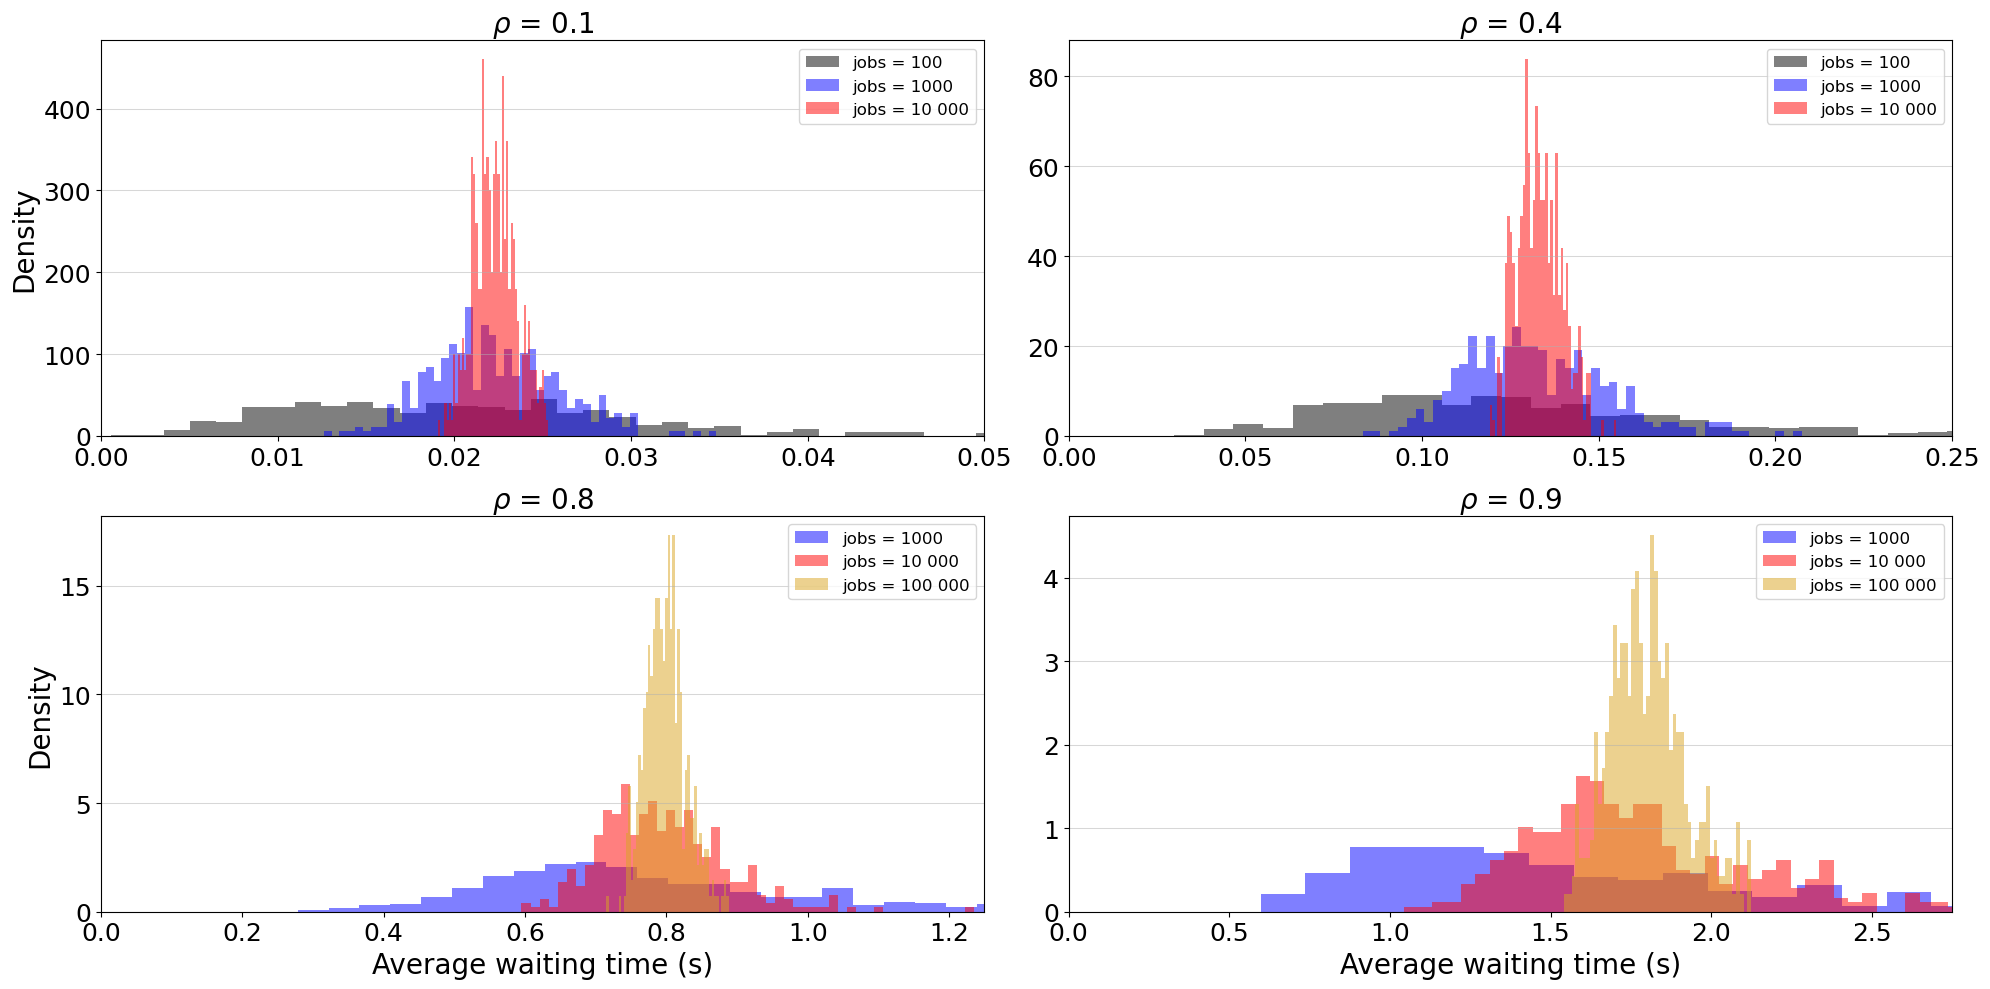

In [15]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))

axs[0, 0].tick_params(axis = 'both', labelsize = 18)
axs[1, 0].tick_params(axis = 'both', labelsize = 18)
axs[0, 1].tick_params(axis = 'both', labelsize = 18)
axs[1, 1].tick_params(axis = 'both', labelsize = 18)

# System load = 0.1
axs[0,0].hist(avg_waiting_time_1['100'], 50, color = 'black', alpha = 0.5, density = True, label = 'jobs = 100')
axs[0,0].hist(avg_waiting_time_1['1000'], 50, color = 'blue', alpha = 0.5, density = True, label = 'jobs = 1000')
axs[0,0].hist(avg_waiting_time_1['10000'], 50, color = 'red', alpha = 0.5, density = True, label = 'jobs = 10 000')
axs[0,0].set_xlim(0, 0.05)
axs[0,0].legend(loc = 'upper right', fontsize = 12)

# System load = 0.4
axs[0,1].hist(avg_waiting_time_4['100'], 50, color = 'black', alpha = 0.5, density = True, label = 'jobs = 100')
axs[0,1].hist(avg_waiting_time_4['1000'], 50, color = 'blue', alpha = 0.5, density = True, label = 'jobs = 1000')
axs[0,1].hist(avg_waiting_time_4['10000'], 50, color = 'red', alpha = 0.5, density = True, label = 'jobs = 10 000')
axs[0,1].set_xlim(0,0.25)
axs[0,1].legend(loc = 'upper right', fontsize = 12)

# System load = 0.8
axs[1,0].hist(avg_waiting_time_8['1000'], 50, color = 'blue', alpha = 0.5, density = True, label = 'jobs = 1000')
axs[1,0].hist(avg_waiting_time_8['10000'], 50, color = 'red', alpha = 0.5, density = True, label = 'jobs = 10 000')
axs[1,0].hist(avg_waiting_time_8['100000'], 50, color = 'goldenrod', alpha = 0.5, density = True, label = 'jobs = 100 000')
axs[1,0].set_xlim(0,1.25)
axs[1,0].legend(loc = 'upper right', fontsize = 12)

# System load = 0.9
axs[1,1].hist(avg_waiting_time_9['1000'], 50, color = 'blue', alpha = 0.5, density = True, label = 'jobs = 1000')
axs[1,1].hist(avg_waiting_time_9['10000'], 50, color = 'red', alpha = 0.5, density = True, label = 'jobs = 10 000')
axs[1,1].hist(avg_waiting_time_9['100000'], 50, color = 'goldenrod', alpha = 0.5, density = True, label = 'jobs = 100 000')
axs[1,1].set_xlim(0,2.75)
axs[1,1].legend(loc = 'upper right', fontsize = 12)

for ax in axs.flat:
    ax.grid(linewidth = .75, axis = 'y', alpha = 0.5)

axs[0,0].set_ylabel('Density', fontsize = 20)
axs[1,0].set_ylabel('Density', fontsize = 20)
axs[1,0].set_xlabel('Average waiting time (s)', fontsize = 20)
axs[1,1].set_xlabel('Average waiting time (s)', fontsize = 20)

axs[0,0].set_title(r'$\rho$ = 0.1', fontsize = 20)
axs[0,1].set_title(r'$\rho$ = 0.4', fontsize = 20)
axs[1,0].set_title(r'$\rho$ = 0.8', fontsize = 20)
axs[1,1].set_title(r'$\rho$ = 0.9', fontsize = 20)

plt.tight_layout()
plt.savefig('determine_n_jobs.pdf')
plt.show()

### Comparing an M/M/n queue and an M/M/1 queue

We will look at the difference in the average waiting times between a server system that has n servers, a system that has 1 server with an n-fold lower arrival rate and a system that has 1 server with an n-fold lower arrival rate but gives priority to the shortest job. We will do this for different values of n and different system loads.

#### System load = 0.1

In [16]:
# Settings of the system
n_jobs = 10_000
n_servers = [1,2,4]

arrival_rate = 0.5
service_time = 1/5

In [17]:
# Creating the M/M/n system with n = 1
system_n = server_system(n_jobs, n_servers[0], arrival_rate, service_time, queue_model='fifo')
# Creating the M/M/1 system
system_1 = server_system(n_jobs, 1, arrival_rate, service_time, queue_model='fifo')
# Creating the M/M/1 system with priority for the shortest job
system_prio = server_system(n_jobs, 1, arrival_rate, service_time, queue_model = 'priority')

In [18]:
# Create dictionaries to store the data
waiting_times_n_1 = dict()
waiting_times_1_1 = dict()
waiting_times_prio_1 = dict()


for i in n_servers:
    
    # Change the capapcity in the M/M/n queue and increase the arrival rate to keep the system load constant
    system_n.set_n_servers(i)
    system_n.arrival_rate = arrival_rate * i
    
    waiting_times_n_1["%s" % i] = []
    waiting_times_1_1["%s" % i] = []
    waiting_times_prio_1["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_n.run()
        system_1.run()
        system_prio.run()
    
        # Store the waiting times
        waiting_times_n_1["%s" % i].append(np.average(system_n.waiting_times))
        waiting_times_1_1["%s" % i].append(np.average(system_1.waiting_times))
        waiting_times_prio_1["%s" % i].append(np.average(system_prio.waiting_times))

In [19]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_n_1["%s" % i]), np.average(waiting_times_1_1["%s" % i]), np.average(waiting_times_prio_1["%s" % i]))

1: 0.022234494539154465 0.022298464532970196 0.02102797111066602
2: 0.002017914963878035 0.022305222490730928 0.021058249870678045
4: 4.135928874652953e-05 0.022218116616928824 0.02107682308774663


In [20]:
stats.ttest_ind(waiting_times_n_1["1"], waiting_times_1_1["1"], equal_var = False)

Ttest_indResult(statistic=-0.7297431029426552, pvalue=0.46576138453912086)

#### System load = 0.4

In [21]:
# Settings of the system
arrival_rate = 2
service_time = 1/5

system_n.arrival_rate = arrival_rate
system_1.arrival_rate = arrival_rate
system_prio.arrival_rate = arrival_rate

In [22]:
# Create dictionaries to store the data
waiting_times_n_4 = dict()
waiting_times_1_4 = dict()
waiting_times_prio_4 = dict()


for i in n_servers:
    
    # Change the capapcity in the M/M/n queue and increase the arrival rate to keep the system load constant
    system_n.set_n_servers(i)
    system_n.arrival_rate = arrival_rate * i
    
    waiting_times_n_4["%s" % i] = []
    waiting_times_1_4["%s" % i] = []
    waiting_times_prio_4["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_n.run()
        system_1.run()
        system_prio.run()
    
        # Store the waiting times
        waiting_times_n_4["%s" % i].append(np.average(system_n.waiting_times))
        waiting_times_1_4["%s" % i].append(np.average(system_1.waiting_times))
        waiting_times_prio_4["%s" % i].append(np.average(system_prio.waiting_times))

In [23]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_n_4["%s" % i]), np.average(waiting_times_1_4["%s" % i]), np.average(waiting_times_prio_4["%s" % i]))

1: 0.13324991266968075 0.13359352738079452 0.10349278677047692
2: 0.038006648925680245 0.13401517379249467 0.10328248503677884
4: 0.007530926206715191 0.13316895516551333 0.10348817316872264


In [24]:
stats.ttest_ind(waiting_times_n_4["1"], waiting_times_1_4["1"], equal_var = False)

Ttest_indResult(statistic=-0.730836160171977, pvalue=0.46509413962139035)

#### System load = 0.8

In [25]:
n_jobs = 100_000

arrival_rate = 4
service_time = 1/5

system_n.arrival_rate = arrival_rate
system_1.arrival_rate = arrival_rate
system_prio.arrival_rate = arrival_rate

system_n.n_jobs = n_jobs
system_1.n_jobs = n_jobs
system_prio.n_jobs = n_jobs

In [26]:
# Create dictionaries to store the data
waiting_times_n_8 = dict()
waiting_times_1_8 = dict()
waiting_times_prio_8 = dict()

for i in n_servers:
    
    # Change the capapcity in the M/M/n queue and increase the arrival rate to keep the system load constant
    system_n.set_n_servers(i)
    system_n.arrival_rate = arrival_rate * i
    
    waiting_times_n_8["%s" % i] = []
    waiting_times_1_8["%s" % i] = []
    waiting_times_prio_8["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_n.run()
        system_1.run()
        system_prio.run()
    
        # Store the waiting times
        waiting_times_n_8["%s" % i].append(np.average(system_n.waiting_times))
        waiting_times_1_8["%s" % i].append(np.average(system_1.waiting_times))
        waiting_times_prio_8["%s" % i].append(np.average(system_prio.waiting_times))

In [27]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_n_8["%s" % i]), np.average(waiting_times_1_8["%s" % i]), np.average(waiting_times_prio_8["%s" % i]))

1: 0.8009402950429737 0.8006461408051024 0.37650715449281025
2: 0.35502058134381315 0.79965930258275 0.3759979824873121
4: 0.1494822040965379 0.8027765660955509 0.37641998378749053


In [28]:
stats.ttest_ind(waiting_times_n_8["2"], waiting_times_1_8["2"], equal_var = False)

Ttest_indResult(statistic=-273.4826361496105, pvalue=0.0)

#### System load = 0.9

In [29]:
arrival_rate = 4.5
service_time = 1/5

system_n.arrival_rate = arrival_rate
system_1.arrival_rate = arrival_rate
system_prio.arrival_rate = arrival_rate

In [30]:
# Create dictionaries to store the data
waiting_times_n_9 = dict()
waiting_times_1_9 = dict()
waiting_times_prio_9 = dict()

for i in n_servers:
    
    # Change the capapcity in the M/M/n queue and increase the arrival rate to keep the system load constant
    system_n.set_n_servers(i)
    system_n.arrival_rate = arrival_rate * i
    
    waiting_times_n_9["%s" % i] = []
    waiting_times_1_9["%s" % i] = []
    waiting_times_prio_9["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_n.run()
        system_1.run()
        system_prio.run()
    
        # Store the waiting times
        waiting_times_n_9["%s" % i].append(np.average(system_n.waiting_times))
        waiting_times_1_9["%s" % i].append(np.average(system_1.waiting_times))
        waiting_times_prio_9["%s" % i].append(np.average(system_prio.waiting_times))

In [31]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_n_9["%s" % i]), np.average(waiting_times_1_9["%s" % i]), np.average(waiting_times_prio_9["%s" % i]))

1: 1.795817664581968 1.7969364834677741 0.6404710609966042
2: 0.849620911138341 1.7912369218478017 0.6373639806156531
4: 0.3959593073291302 1.7914859216836456 0.6410219502086184


In [32]:
stats.ttest_ind(waiting_times_n_9["2"], waiting_times_1_9["2"], equal_var = False)

Ttest_indResult(statistic=-148.11125340986695, pvalue=0.0)

#### Plot

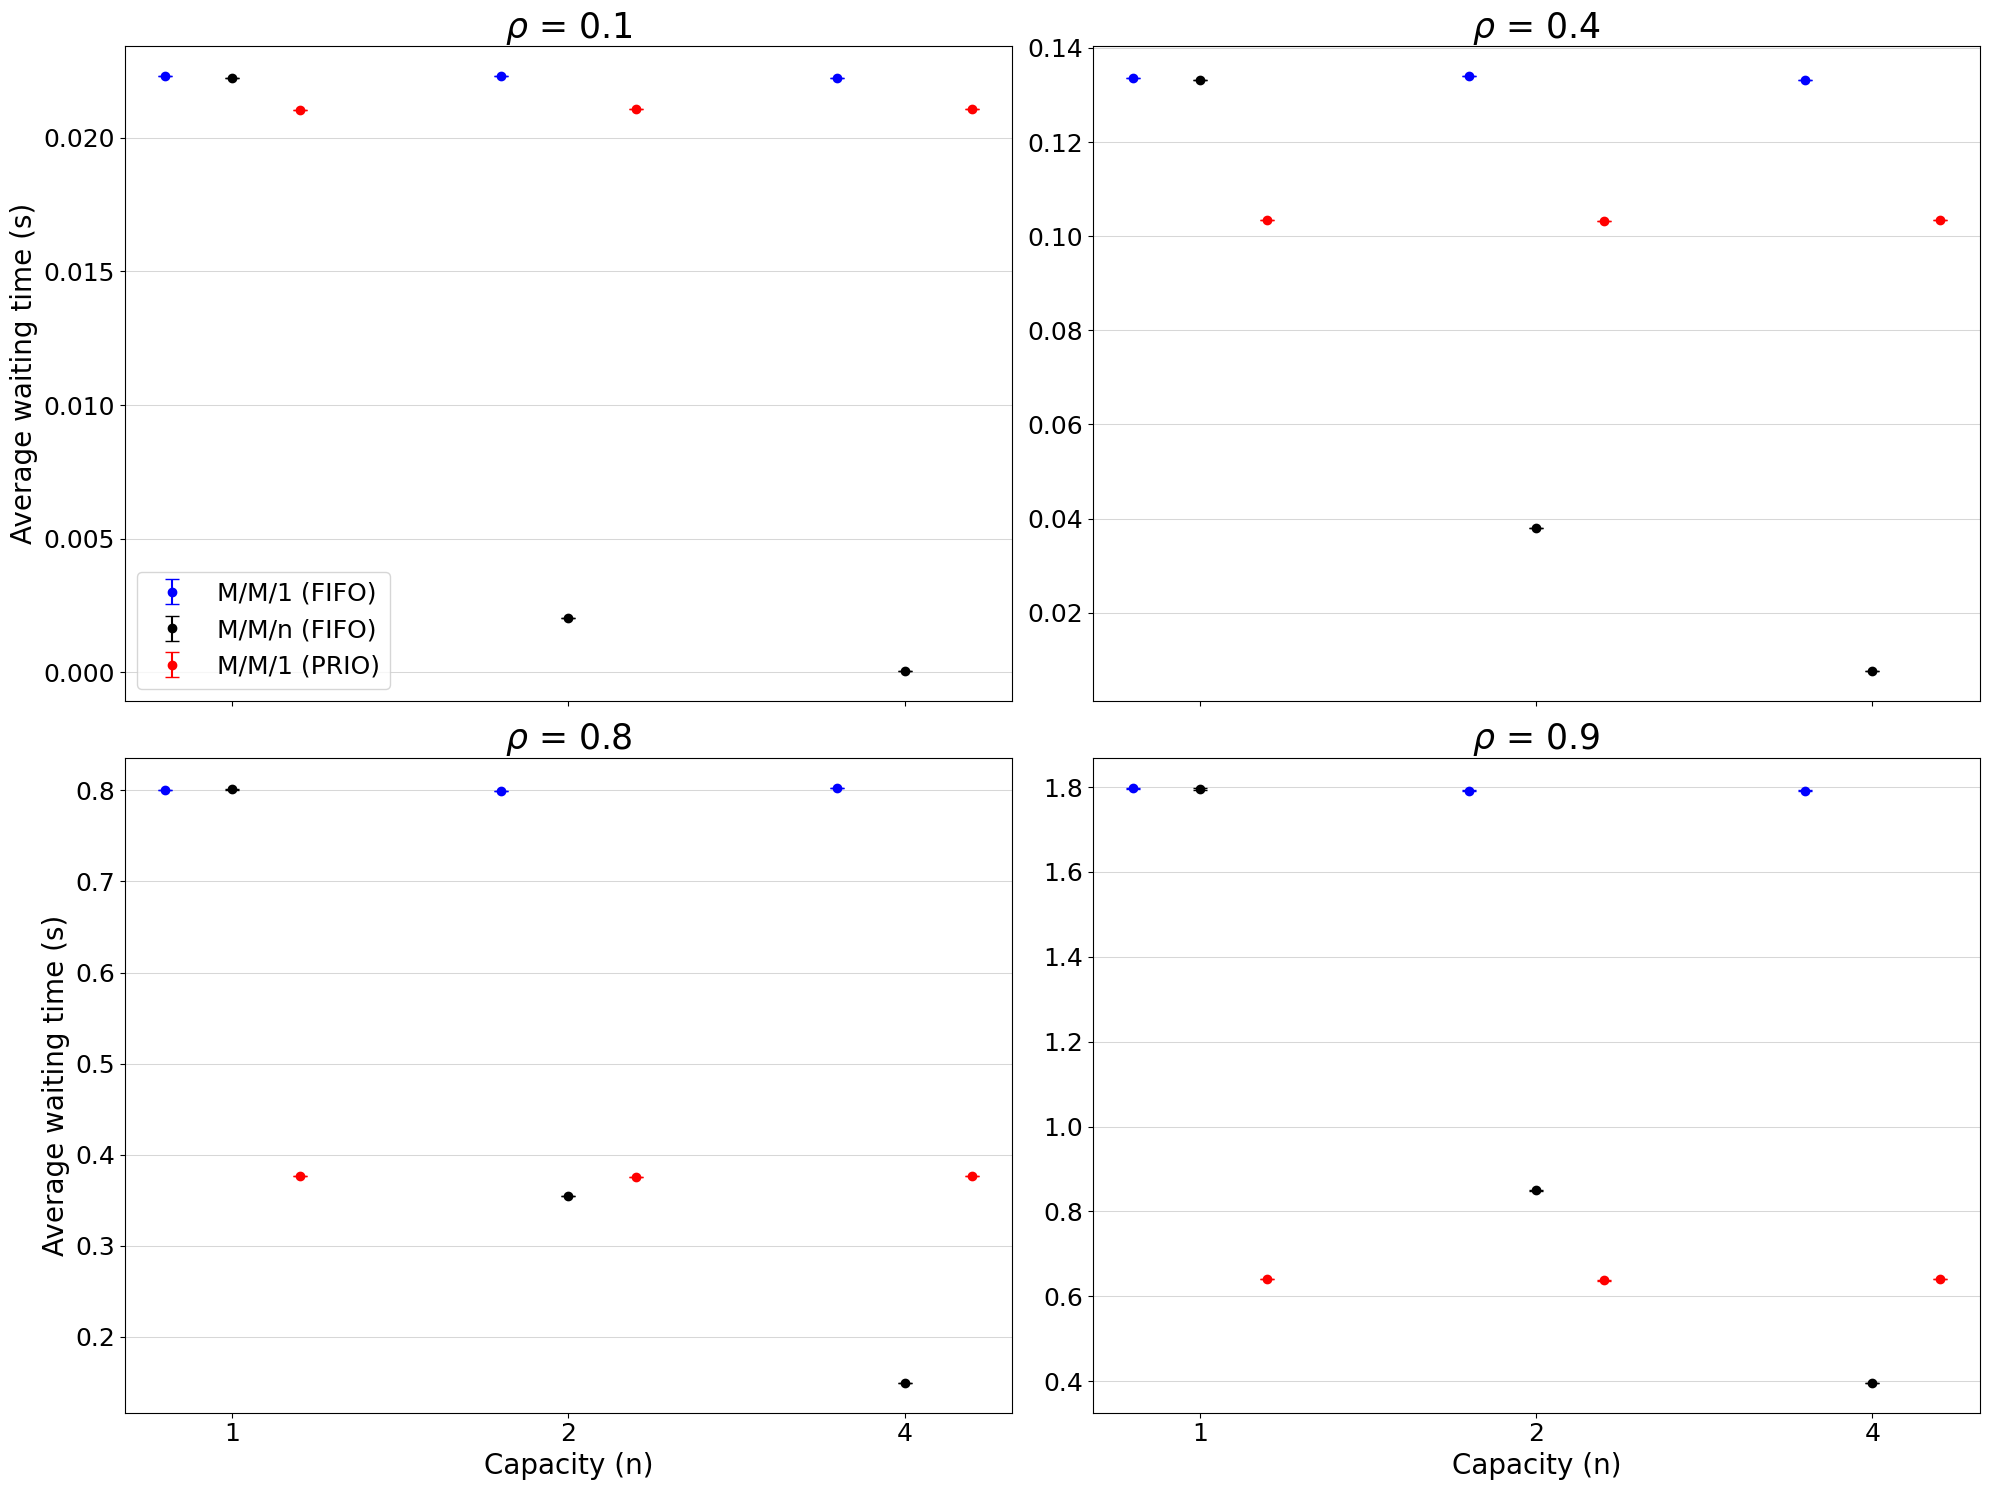

In [33]:
fig, axs = plt.subplots(2, 2, figsize = (20, 15), sharex = True)

axs[0, 0].tick_params(axis = 'both', labelsize = 18)
axs[1, 0].tick_params(axis = 'both', labelsize = 18)
axs[0, 1].tick_params(axis = 'both', labelsize = 18)
axs[1, 1].tick_params(axis = 'both', labelsize = 18)

# System load = 0.1
axs[0,0].errorbar(0.8, np.average(waiting_times_1_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_1['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/M/1 (FIFO)')
axs[0,0].errorbar(1, np.average(waiting_times_n_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_1['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/M/n (FIFO)')
axs[0,0].errorbar(1.2, np.average(waiting_times_prio_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_1['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/M/1 (PRIO)')

axs[0,0].errorbar(1.8, np.average(waiting_times_1_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_1['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,0].errorbar(2, np.average(waiting_times_n_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_1['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,0].errorbar(2.2, np.average(waiting_times_prio_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_1['2']) / np.sqrt(repeats), color = 'red', capsize = 5)

axs[0,0].errorbar(2.8, np.average(waiting_times_1_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_1['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,0].errorbar(3, np.average(waiting_times_n_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_1['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,0].errorbar(3.2, np.average(waiting_times_prio_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_1['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,0].legend(fontsize = 18)

# System load = 0.4
axs[0,1].errorbar(0.8, np.average(waiting_times_1_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_4['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/M/1 (FIFO)')
axs[0,1].errorbar(1, np.average(waiting_times_n_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_4['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/M/n (FIFO)')
axs[0,1].errorbar(1.2, np.average(waiting_times_prio_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_4['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/M/1 (PRIO)')

axs[0,1].errorbar(1.8, np.average(waiting_times_1_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_4['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,1].errorbar(2, np.average(waiting_times_n_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_4['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,1].errorbar(2.2, np.average(waiting_times_prio_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_4['2']) / np.sqrt(repeats), color = 'red', capsize = 5)

axs[0,1].errorbar(2.8, np.average(waiting_times_1_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_4['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,1].errorbar(3, np.average(waiting_times_n_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_4['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,1].errorbar(3.2, np.average(waiting_times_prio_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_4['4']) / np.sqrt(repeats), color = 'red', capsize = 5)

# System load = 0.8
axs[1,0].errorbar(0.8, np.average(waiting_times_1_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_8['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/M/1 (FIFO)')
axs[1,0].errorbar(1, np.average(waiting_times_n_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_8['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/M/n (FIFO)')
axs[1,0].errorbar(1.2, np.average(waiting_times_prio_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_8['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/M/1 (PRIO)')

axs[1,0].errorbar(1.8, np.average(waiting_times_1_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_8['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,0].errorbar(2, np.average(waiting_times_n_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_8['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,0].errorbar(2.2, np.average(waiting_times_prio_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_8['2']) / np.sqrt(repeats), color = 'red', capsize = 5)

axs[1,0].errorbar(2.8, np.average(waiting_times_1_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_8['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,0].errorbar(3, np.average(waiting_times_n_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_8['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,0].errorbar(3.2, np.average(waiting_times_prio_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_8['4']) / np.sqrt(repeats), color = 'red', capsize = 5)

# System load = 0.9
axs[1,1].errorbar(0.8, np.average(waiting_times_1_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_9['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/M/1 (FIFO)')
axs[1,1].errorbar(1, np.average(waiting_times_n_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_9['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/M/n (FIFO)')
axs[1,1].errorbar(1.2, np.average(waiting_times_prio_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_9['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/M/1 (PRIO)')

axs[1,1].errorbar(1.8, np.average(waiting_times_1_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_9['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,1].errorbar(2, np.average(waiting_times_n_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_9['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,1].errorbar(2.2, np.average(waiting_times_prio_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_9['2']) / np.sqrt(repeats), color = 'red', capsize = 5)

axs[1,1].errorbar(2.8, np.average(waiting_times_1_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_9['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,1].errorbar(3, np.average(waiting_times_n_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_9['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,1].errorbar(3.2, np.average(waiting_times_prio_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_9['4']) / np.sqrt(repeats), color = 'red', capsize = 5)

for ax in axs.flat:
    ax.grid(linewidth = .75, axis = 'y', alpha = 0.5)
    ax.set_xticks([1, 2, 3], ['1', '2', '4'], fontsize = 18)

axs[0,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_xlabel('Capacity (n)', fontsize = 20)
axs[1,1].set_xlabel('Capacity (n)', fontsize = 20)

axs[0,0].set_title(r'$\rho$ = 0.1', fontsize = 25)
axs[0,1].set_title(r'$\rho$ = 0.4', fontsize = 25)
axs[1,0].set_title(r'$\rho$ = 0.8', fontsize = 25)
axs[1,1].set_title(r'$\rho$ = 0.9', fontsize = 25)

plt.tight_layout()
plt.savefig('mm1vsmmn.pdf')
plt.show()

### Effect of service time distribution on the average waiting time

#### System load = 0.1

In [34]:
# Settings of the system
n_jobs = 10_000

arrival_rate = 0.1
service_time = 1

In [35]:
# Creating the M/D/n system with n = 1
system_d_n = server_system(n_jobs, n_servers[0], arrival_rate, service_time, service_process='deterministic')
# Creating the M/D/1 system
system_d_1 = server_system(n_jobs, 1, arrival_rate, service_time, service_process='deterministic')

# Creating the M/H/n system with n = 1
system_h_n = server_system(n_jobs, n_servers[0], arrival_rate, service_time / 2, service_process='hyperexponential')
# Creating the M/H/1 system
system_h_1 = server_system(n_jobs, 1, arrival_rate, service_time / 2, service_process='hyperexponential')

In [36]:
# Create dictionaries to store the data
waiting_times_d_n_1 = dict()
waiting_times_d_1_1 = dict()
waiting_times_h_n_1 = dict()
waiting_times_h_1_1 = dict()

for i in n_servers:
    
    # Change capapcity in the M/D/n and M/H/n queue and increase arrival rate to keep the system load constant
    system_d_n.set_n_servers(i)
    system_d_n.arrival_rate = arrival_rate * i
    system_h_n.set_n_servers(i)
    system_h_n.arrival_rate = arrival_rate * i
    
    waiting_times_d_n_1["%s" % i] = []
    waiting_times_d_1_1["%s" % i] = []
    waiting_times_h_n_1["%s" % i] = []
    waiting_times_h_1_1["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_d_n.run()
        system_d_1.run()
        system_h_n.run()
        system_h_1.run()
    
        # Store the waiting times
        waiting_times_d_n_1["%s" % i].append(np.average(system_d_n.waiting_times))
        waiting_times_d_1_1["%s" % i].append(np.average(system_d_1.waiting_times))
        waiting_times_h_n_1["%s" % i].append(np.average(system_h_n.waiting_times))
        waiting_times_h_1_1["%s" % i].append(np.average(system_h_1.waiting_times))

In [37]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_d_n_1["%s" % i]), np.average(waiting_times_d_1_1["%s" % i]), np.average(waiting_times_h_n_1["%s" % i]), np.average(waiting_times_h_1_1["%s" % i]))

1: 0.05567147910573378 0.05546679718176404 0.195388526889122 0.19455734632695473
2: 0.006234618242226888 0.0555132660874213 0.015036043598551659 0.19429711116225343
4: 0.00015914884434947618 0.05561276102133335 0.0002710741313250127 0.19505274697561326


#### System load = 0.4

In [38]:
# Settings of the system
arrival_rate = 0.4
service_time = 1

system_d_n.arrival_rate = arrival_rate
system_d_1.arrival_rate = arrival_rate
system_h_n.arrival_rate = arrival_rate
system_h_1.arrival_rate = arrival_rate

In [39]:
# Create dictionaries to store the data
waiting_times_d_n_4 = dict()
waiting_times_d_1_4 = dict()
waiting_times_h_n_4 = dict()
waiting_times_h_1_4 = dict()

for i in n_servers:
    
    # Change capapcity in the M/D/n and M/H/n queue and increase arrival rate to keep the system load constant
    system_d_n.set_n_servers(i)
    system_d_n.arrival_rate = arrival_rate * i
    system_h_n.set_n_servers(i)
    system_h_n.arrival_rate = arrival_rate * i
    
    waiting_times_d_n_4["%s" % i] = []
    waiting_times_d_1_4["%s" % i] = []
    waiting_times_h_n_4["%s" % i] = []
    waiting_times_h_1_4["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_d_n.run()
        system_d_1.run()
        system_h_n.run()
        system_h_1.run()
    
        # Store the waiting times
        waiting_times_d_n_4["%s" % i].append(np.average(system_d_n.waiting_times))
        waiting_times_d_1_4["%s" % i].append(np.average(system_d_1.waiting_times))
        waiting_times_h_n_4["%s" % i].append(np.average(system_h_n.waiting_times))
        waiting_times_h_1_4["%s" % i].append(np.average(system_h_1.waiting_times))

In [40]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_d_n_4["%s" % i]), np.average(waiting_times_d_1_4["%s" % i]), np.average(waiting_times_h_n_4["%s" % i]), np.average(waiting_times_h_1_4["%s" % i]))

1: 0.33326948277255786 0.33280200825473244 1.169580876591172 1.1652450711927895
2: 0.10320249721322927 0.333422003060319 0.3061328860495965 1.1692744685629903
4: 0.02275135730168256 0.33243156449129274 0.05590232587359706 1.161191047973457


#### System load = 0.8

In [41]:
n_jobs = 100_000

arrival_rate = 0.8
service_time = 1

system_d_n.arrival_rate = arrival_rate
system_d_1.arrival_rate = arrival_rate
system_h_n.arrival_rate = arrival_rate
system_h_1.arrival_rate = arrival_rate

system_d_n.n_jobs = n_jobs
system_d_1.n_jobs = n_jobs
system_h_n.n_jobs = n_jobs
system_h_1.n_jobs = n_jobs

In [42]:
# Create dictionaries to store the data
waiting_times_d_n_8 = dict()
waiting_times_d_1_8 = dict()
waiting_times_h_n_8 = dict()
waiting_times_h_1_8 = dict()

for i in n_servers:
    
    # Change capapcity in the M/D/n and M/H/n queue and increase arrival rate to keep the system load constant
    system_d_n.set_n_servers(i)
    system_d_n.arrival_rate = arrival_rate * i
    system_h_n.set_n_servers(i)
    system_h_n.arrival_rate = arrival_rate * i
    
    waiting_times_d_n_8["%s" % i] = []
    waiting_times_d_1_8["%s" % i] = []
    waiting_times_h_n_8["%s" % i] = []
    waiting_times_h_1_8["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_d_n.run()
        system_d_1.run()
        system_h_n.run()
        system_h_1.run()
    
        # Store the waiting times
        waiting_times_d_n_8["%s" % i].append(np.average(system_d_n.waiting_times))
        waiting_times_d_1_8["%s" % i].append(np.average(system_d_1.waiting_times))
        waiting_times_h_n_8["%s" % i].append(np.average(system_h_n.waiting_times))
        waiting_times_h_1_8["%s" % i].append(np.average(system_h_1.waiting_times))

In [43]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_d_n_8["%s" % i]), np.average(waiting_times_d_1_8["%s" % i]), np.average(waiting_times_h_n_8["%s" % i]), np.average(waiting_times_h_1_8["%s" % i]))

1: 1.9995368649514136 1.9963666383260854 6.988558344147447 7.030027961140656
2: 0.9036081066046355 1.9992289475809566 3.0481643649105674 7.01489287662653
4: 0.3855771058490234 2.0032858179109247 1.2528709391882327 7.002993820409522


#### System load = 0.9

In [44]:
arrival_rate = 0.9
service_time = 1

system_d_n.arrival_rate = arrival_rate
system_d_1.arrival_rate = arrival_rate
system_h_n.arrival_rate = arrival_rate
system_h_1.arrival_rate = arrival_rate

In [45]:
# Create dictionaries to store the data
waiting_times_d_n_9 = dict()
waiting_times_d_1_9 = dict()
waiting_times_h_n_9 = dict()
waiting_times_h_1_9 = dict()

for i in n_servers:
    
    # Change capapcity in the M/D/n and M/H/n queue and increase arrival rate to keep the system load constant
    system_d_n.set_n_servers(i)
    system_d_n.arrival_rate = arrival_rate * i
    system_h_n.set_n_servers(i)
    system_h_n.arrival_rate = arrival_rate * i
    
    waiting_times_d_n_9["%s" % i] = []
    waiting_times_d_1_9["%s" % i] = []
    waiting_times_h_n_9["%s" % i] = []
    waiting_times_h_1_9["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_d_n.run()
        system_d_1.run()
        system_h_n.run()
        system_h_1.run()
    
        # Store the waiting times
        waiting_times_d_n_9["%s" % i].append(np.average(system_d_n.waiting_times))
        waiting_times_d_1_9["%s" % i].append(np.average(system_d_1.waiting_times))
        waiting_times_h_n_9["%s" % i].append(np.average(system_h_n.waiting_times))
        waiting_times_h_1_9["%s" % i].append(np.average(system_h_1.waiting_times))

In [46]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_d_n_9["%s" % i]), np.average(waiting_times_d_1_9["%s" % i]), np.average(waiting_times_h_n_9["%s" % i]), np.average(waiting_times_h_1_9["%s" % i]))

1: 4.495151475700134 4.504831652738876 15.652104963044922 15.724196003431727
2: 2.1398781635598483 4.502602467399477 7.403224040754099 15.768855034723279
4: 0.9970682957030544 4.48686461213676 3.3925029213042586 15.798021963809132


#### Plot

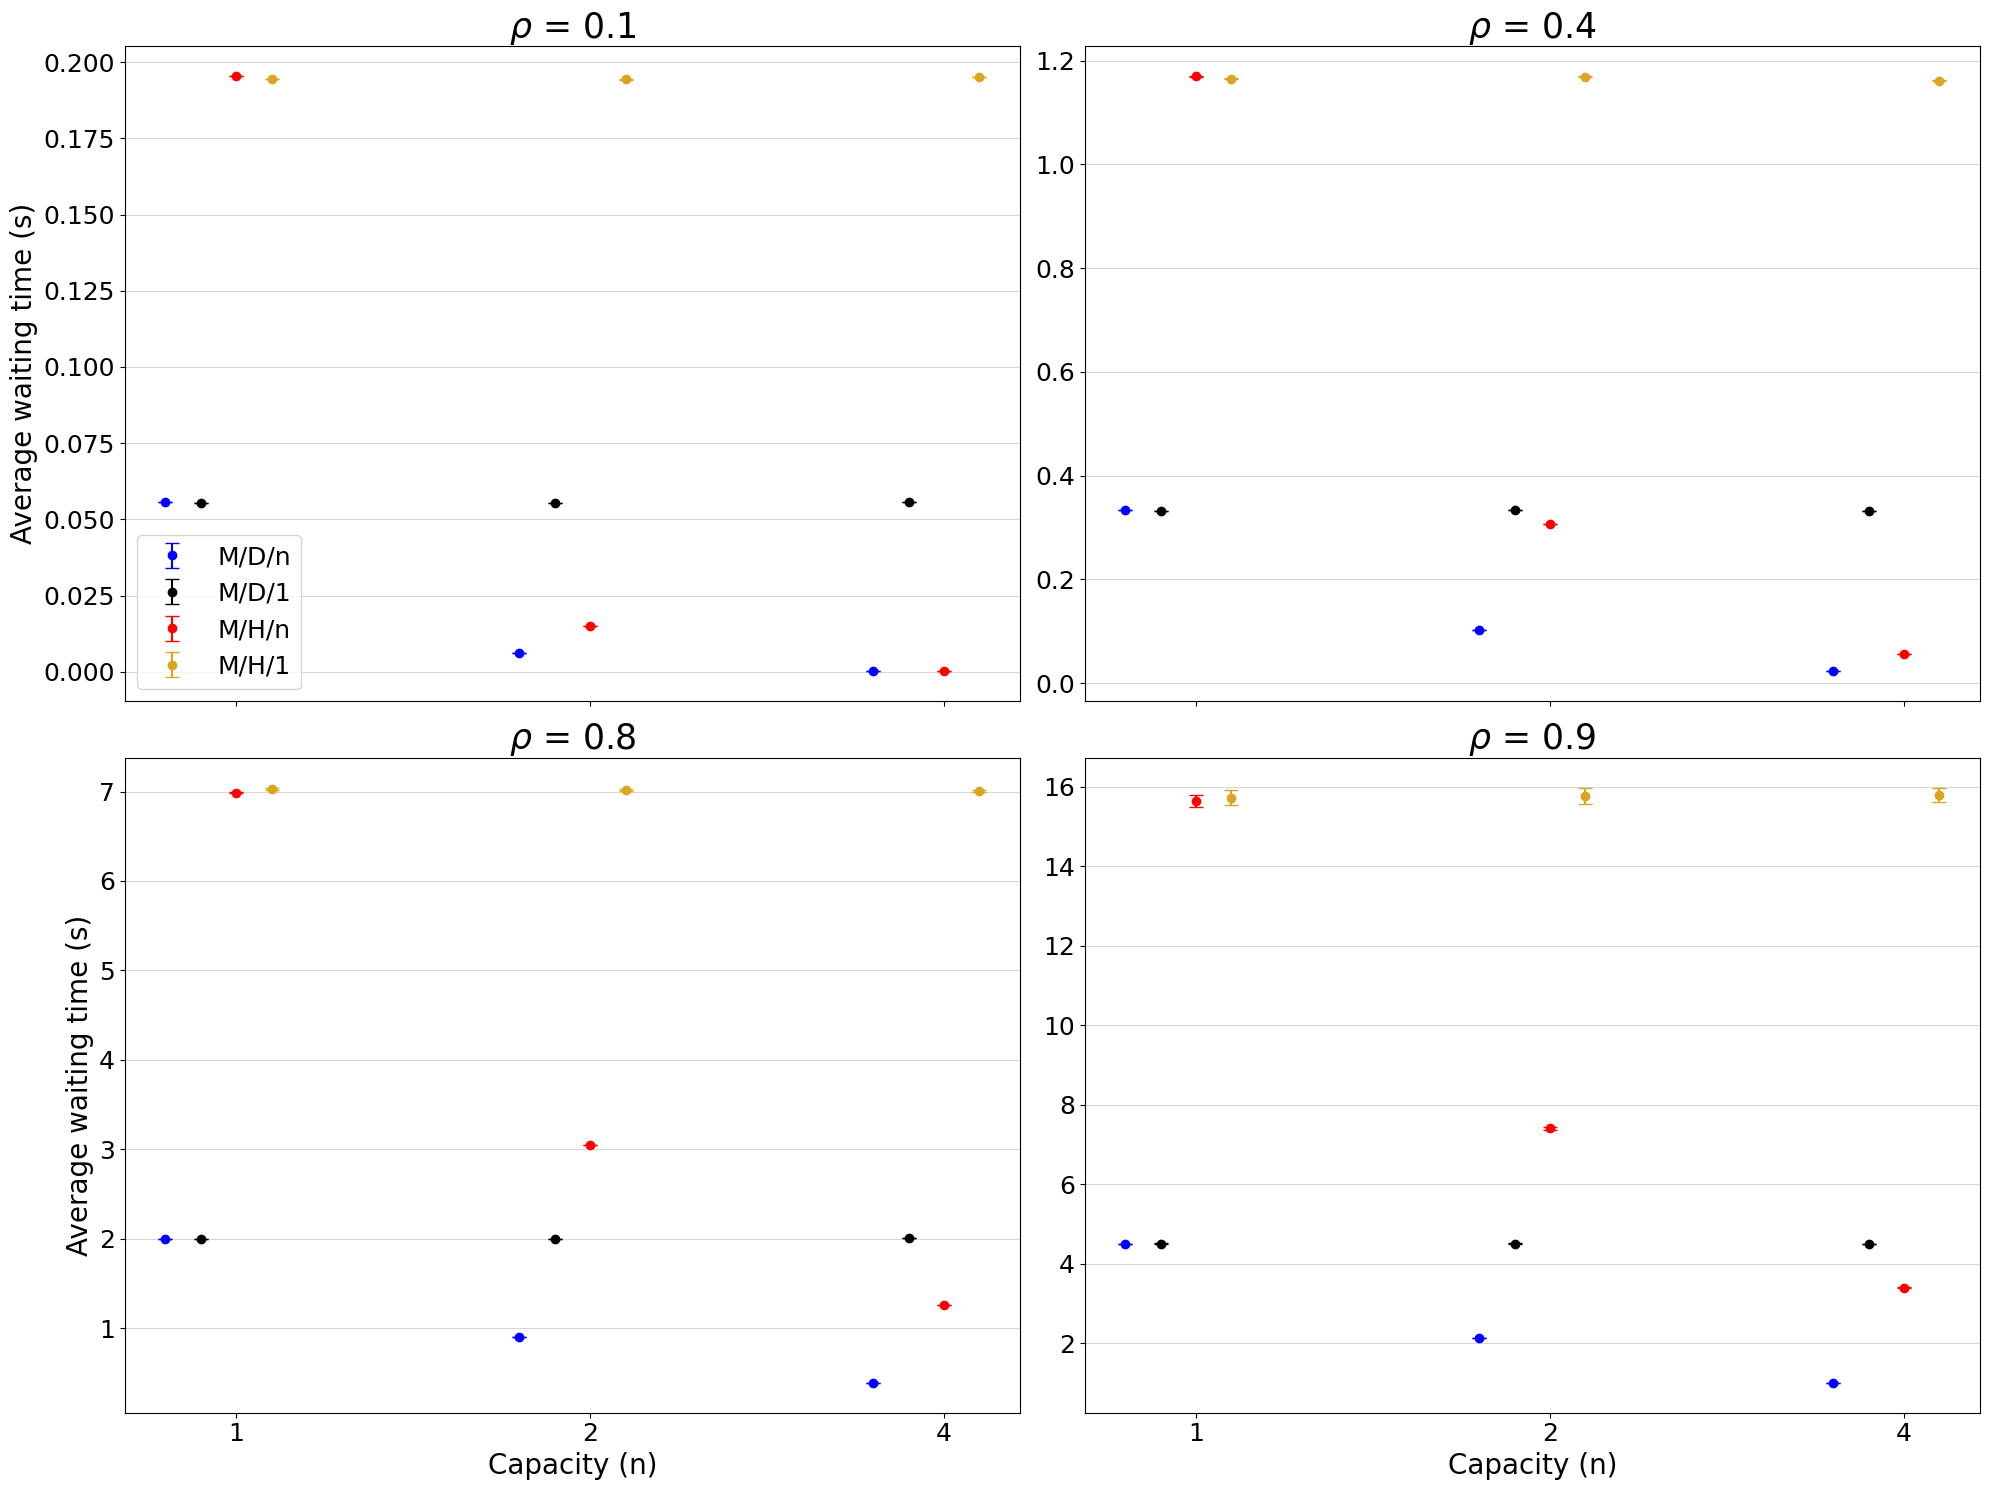

In [47]:
fig, axs = plt.subplots(2, 2, figsize = (20, 15), sharex = True)

axs[0, 0].tick_params(axis = 'both', labelsize = 18)
axs[1, 0].tick_params(axis = 'both', labelsize = 18)
axs[0, 1].tick_params(axis = 'both', labelsize = 18)
axs[1, 1].tick_params(axis = 'both', labelsize = 18)

# System load = 0.1
axs[0,0].errorbar(0.8, np.average(waiting_times_d_n_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_1['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/D/n')
axs[0,0].errorbar(0.9, np.average(waiting_times_d_1_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_1['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/D/1')
axs[0,0].errorbar(1.0, np.average(waiting_times_h_n_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_1['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/H/n')
axs[0,0].errorbar(1.1, np.average(waiting_times_h_1_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_1['1']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5, label = 'M/H/1')

axs[0,0].errorbar(1.8, np.average(waiting_times_d_n_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_1['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,0].errorbar(1.9, np.average(waiting_times_d_1_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_1['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,0].errorbar(2.0, np.average(waiting_times_h_n_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_1['2']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,0].errorbar(2.1, np.average(waiting_times_h_1_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_1['2']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

axs[0,0].errorbar(2.8, np.average(waiting_times_d_n_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_1['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,0].errorbar(2.9, np.average(waiting_times_d_1_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_1['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,0].errorbar(3.0, np.average(waiting_times_h_n_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_1['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,0].errorbar(3.1, np.average(waiting_times_h_1_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_1['4']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)
axs[0,0].legend(fontsize = 18)

# System load = 0.4
axs[0,1].errorbar(0.8, np.average(waiting_times_d_n_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_4['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/D/n')
axs[0,1].errorbar(0.9, np.average(waiting_times_d_1_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_4['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/D/1')
axs[0,1].errorbar(1.0, np.average(waiting_times_h_n_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_4['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/H/n')
axs[0,1].errorbar(1.1, np.average(waiting_times_h_1_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_4['1']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5, label = 'M/H/1')

axs[0,1].errorbar(1.8, np.average(waiting_times_d_n_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_4['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,1].errorbar(1.9, np.average(waiting_times_d_1_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_4['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,1].errorbar(2.0, np.average(waiting_times_h_n_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_4['2']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,1].errorbar(2.1, np.average(waiting_times_h_1_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_4['2']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

axs[0,1].errorbar(2.8, np.average(waiting_times_d_n_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_4['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,1].errorbar(2.9, np.average(waiting_times_d_1_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_4['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,1].errorbar(3.0, np.average(waiting_times_h_n_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_4['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,1].errorbar(3.1, np.average(waiting_times_h_1_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_4['4']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

# System load = 0.8
axs[1,0].errorbar(0.8, np.average(waiting_times_d_n_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_8['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/D/n')
axs[1,0].errorbar(0.9, np.average(waiting_times_d_1_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_8['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/D/1')
axs[1,0].errorbar(1.0, np.average(waiting_times_h_n_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_8['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/H/n')
axs[1,0].errorbar(1.1, np.average(waiting_times_h_1_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_8['1']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5, label = 'M/H/1')

axs[1,0].errorbar(1.8, np.average(waiting_times_d_n_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_8['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,0].errorbar(1.9, np.average(waiting_times_d_1_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_8['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,0].errorbar(2.0, np.average(waiting_times_h_n_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_8['2']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[1,0].errorbar(2.1, np.average(waiting_times_h_1_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_8['2']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

axs[1,0].errorbar(2.8, np.average(waiting_times_d_n_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_8['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,0].errorbar(2.9, np.average(waiting_times_d_1_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_8['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,0].errorbar(3.0, np.average(waiting_times_h_n_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_8['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[1,0].errorbar(3.1, np.average(waiting_times_h_1_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_8['4']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)


# System load = 0.9
axs[1,1].errorbar(0.8, np.average(waiting_times_d_n_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_9['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/D/n')
axs[1,1].errorbar(0.9, np.average(waiting_times_d_1_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_9['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/D/1')
axs[1,1].errorbar(1.0, np.average(waiting_times_h_n_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_9['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/H/n')
axs[1,1].errorbar(1.1, np.average(waiting_times_h_1_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_9['1']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5, label = 'M/H/1')

axs[1,1].errorbar(1.8, np.average(waiting_times_d_n_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_9['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,1].errorbar(1.9, np.average(waiting_times_d_1_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_9['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,1].errorbar(2.0, np.average(waiting_times_h_n_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_9['2']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[1,1].errorbar(2.1, np.average(waiting_times_h_1_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_9['2']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

axs[1,1].errorbar(2.8, np.average(waiting_times_d_n_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_9['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,1].errorbar(2.9, np.average(waiting_times_d_1_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_9['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,1].errorbar(3.0, np.average(waiting_times_h_n_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_9['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[1,1].errorbar(3.1, np.average(waiting_times_h_1_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_9['4']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)


for ax in axs.flat:
    ax.grid(linewidth = .75, axis = 'y', alpha = 0.5)
    ax.set_xticks([1, 2, 3], ['1', '2', '4'], fontsize = 18)

axs[0,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_xlabel('Capacity (n)', fontsize = 20)
axs[1,1].set_xlabel('Capacity (n)', fontsize = 20)

axs[0,0].set_title(r'$\rho$ = 0.1', fontsize = 25)
axs[0,1].set_title(r'$\rho$ = 0.4', fontsize = 25)
axs[1,0].set_title(r'$\rho$ = 0.8', fontsize = 25)
axs[1,1].set_title(r'$\rho$ = 0.9', fontsize = 25)

plt.tight_layout()
plt.savefig('md_vs_mh.pdf')
plt.show()